In [186]:
import pandas as pd 

#Put the path of your initial data
df_record_initial = pd.read_excel("../dataTer/_Fichier_Patient.xlsx")

#Put the path of your data Transform thanks to Nifi
df_patient_transform = pd.read_csv("./df_patient_transform.csv")
#Put the path of the data rejected thanks to the treatment script
df_rejected = pd.read_csv("./rejected.csv")
display(df_rejected)


,Row_id,PatientNumber,FathersName,Type,Message,Rule,ColumnsName,FathersPreName,PlaceOfBirth,Hospital,DateOfBirth
0,0,37,NaN,warning,Alpha characters only,V-Alpha-2,FathersName,NaN,NaN,NaN,NaN
1,1,53,NaN,warning,Alpha characters only,V-Alpha-2,FathersName,NaN,NaN,NaN,NaN
2,2,91,NaN,warning,Alpha characters only,V-Alpha-2,FathersName,NaN,NaN,NaN,NaN
3,3,112,NaN,warning,Alpha characters only,V-Alpha-2,FathersName,NaN,NaN,NaN,NaN
4,4,146,NaN,warning,Alpha characters only,V-Alpha-2,FathersName,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
395,195,8094,NaN,warning,Alpha characters only,V-Alpha-2,FathersPreName,NaN,NaN,NaN,NaN
396,196,8173,NaN,warning,Alpha characters only,V-Alpha-2,FathersPreName,NaN,NaN,NaN,NaN
397,197,8195,NaN,warning,Alpha characters only,V-Alpha-2,FathersPreName,NaN,NaN,NaN,NaN
398,198,8211,NaN,warning,Alpha characters only,V-Alpha-2,FathersPreName,NaN,NaN,NaN,NaN


In [189]:
columnsName = df_rejected['ColumnsName'].unique()
columnsName = ', '.join(columnsName)
columnsName_list = columnsName.split(', ')
# Sélectionner les colonnes 'PatientNumber', 'message', 'type', et les colonnes spécifiques
df_rejected_test = df_rejected[['Row_id','PatientNumber', 'Message', 'Type', 'ColumnsName', 'Rule'] + columnsName_list]
#display(df_rejected_test)

# Groupez le dataframe par 'PatientNumber', 'message' et 'type'
grouped = df_rejected_test.groupby(['Row_id', 'Message', 'Type', 'Rule'])

# Créez une fonction pour combiner les valeurs de 'columnsName'
def combine_columns(series):
    return ', '.join(series.dropna().unique())

# Appliquez la fonction pour combiner les valeurs et créez un nouveau dataframe
new_df_rejected = grouped.agg({'ColumnsName': combine_columns, 'PatientNumber': 'first', 'FathersName': 'first', 'FathersPreName': 'first',}).reset_index()

display(new_df_rejected)


,Row_id,Message,Type,Rule,ColumnsName,PatientNumber,FathersName,FathersPreName
0,0,Alpha characters only,warning,V-Alpha-2,"FathersName, FathersPreName",37,NaN,NaN
1,1,Alpha characters only,warning,V-Alpha-2,"FathersName, FathersPreName",53,NaN,NaN
2,2,Alpha characters only,warning,V-Alpha-2,"FathersName, FathersPreName",91,NaN,NaN
3,3,Alpha characters only,warning,V-Alpha-2,"FathersName, FathersPreName",112,NaN,NaN
4,4,Alpha characters only,warning,V-Alpha-2,"FathersName, FathersPreName",146,NaN,NaN
...,...,...,...,...,...,...,...,...
195,195,Alpha characters only,warning,V-Alpha-2,"FathersName, FathersPreName",8094,NaN,NaN
196,196,Alpha characters only,warning,V-Alpha-2,"FathersName, FathersPreName",8173,NaN,NaN
197,197,Alpha characters only,warning,V-Alpha-2,"FathersName, FathersPreName",8195,NaN,NaN
198,198,Alpha characters only,warning,V-Alpha-2,"FathersName, FathersPreName",8211,NaN,NaN


Nombre de records initials ( Données source) vs Nombre de records Final en %


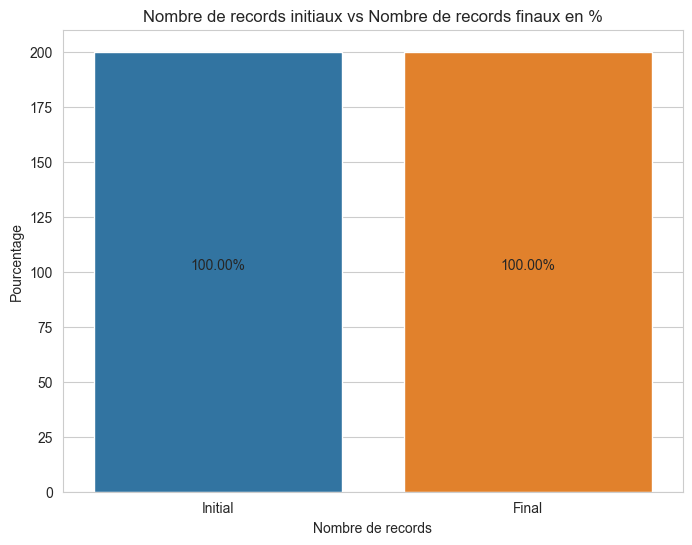

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

nbr_records_initiaux = len(df_record_initial)
nbr_records_finaux = len(df_patient_transform)

# Calcul du pourcentage de records restants
pourcentage_records_restants = (nbr_records_finaux / nbr_records_initiaux) * 100

# Création d'une liste des données à représenter
data_dict = {'Records': ['Initial', 'Final'], 'Nombre': [nbr_records_initiaux, nbr_records_finaux], 'Pourcentage': [100, pourcentage_records_restants]}
df = pd.DataFrame(data_dict)

# Création du graphique avec Seaborn
sns.set_style("whitegrid")
sns.barplot(x="Records", y="Nombre", data=df)

# Ajout des valeurs numériques sur le graphique
for index, row in df.iterrows():
    plt.text(x=index, y=row['Pourcentage']+1, s=f"{row['Pourcentage']:.2f}%", ha='center')

# Ajout de la légende du graphique
plt.xlabel('Nombre de records')
plt.ylabel('Pourcentage')
plt.title('Nombre de records initiaux vs Nombre de records finaux en %')

# Ajustement de la taille du graphique
plt.gcf().set_size_inches(8, 6)

# Affichage du graphique
plt.show()

Nombre des records rejetés et les regles appliquées avec un %

In [223]:
new_df_rejected_warning = new_df_rejected[new_df_rejected['Type'] == 'rejected']
records_warning_par_regles = new_df_rejected_warning['Rule'].value_counts().to_dict()

print(records_warning_par_regles)

{}


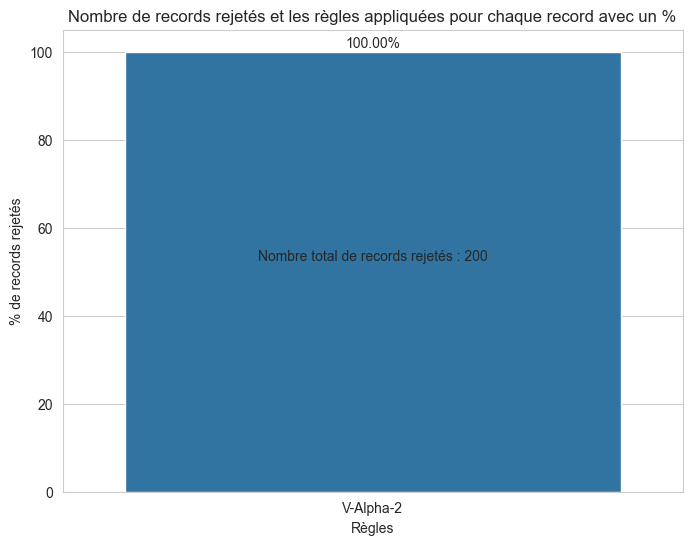

In [233]:

import seaborn as sns
import matplotlib.pyplot as plt

nbr_records_initiaux = len(df_record_initial)

num_records_warning = len(new_df_rejected[new_df_rejected['Type'] == 'warning'])

# Règles appliquées
regles = new_df_rejected[new_df_rejected['Type'] == 'warning']['Rule'].unique()

if len(regles) > 0:
    # Nombre de records rejetés par règle
    records_warning_par_regles = new_df_rejected['Rule'].value_counts().to_dict()

    # Calcul du pourcentage de records rejetés par règle
    pourcentages_records_warning_par_regles = [(r / num_records_warning) * 100 for r in records_warning_par_regles.values()]

    # Création d'un dictionnaire des données à représenter
    data_dict = {'Règles': regles, 'Pourcentage de records rejetés': pourcentages_records_warning_par_regles}

    # Conversion du dictionnaire en DataFrame
    df_test1 = pd.DataFrame(data_dict)

    # Création du graphique avec Seaborn
    sns.set_style("whitegrid")
    sns.barplot(x="Règles", y="Pourcentage de records rejetés", data=df_test1)

    # Ajout des valeurs numériques sur le graphique
    for index, row in df_test1.iterrows():
        plt.text(x=index, y=row['Pourcentage de records rejetés']+1, s=f"{row['Pourcentage de records rejetés']:.2f}%", ha='center')

    # Affichage du nombre total de records rejetés
    plt.text(0.5, 0.50, f'Nombre total de records rejetés : {num_records_warning}', transform=plt.gca().transAxes, ha='center')

    # Ajout de la légende du graphique
    plt.xlabel('Règles')
    plt.ylabel('% de records rejetés')
    plt.title('Nombre de records rejetés et les règles appliquées pour chaque record avec un %')

    # Ajustement de la taille du graphique
    plt.gcf().set_size_inches(8, 6)

    # Affichage du graphique
    plt.show()
else : 
    print("No rules were applied.")


In [232]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

nbr_records_initiaux = len(df_record_initial)
num_records_rejected = len(new_df_rejected[new_df_rejected['Type'] == 'rejected'])

# Règles appliquées
regles = new_df_rejected[new_df_rejected['Type'] == 'rejected']['Rule'].unique()

if len(regles) > 0:
    # Nombre de records rejetés par règle
    new_df_rejected_warning = new_df_rejected[new_df_rejected['Type'] == 'rejected']
    records_rejected_par_regles = new_df_rejected_warning['Rule'].value_counts().to_dict()

    # Calcul du pourcentage de records rejetés par règle
    pourcentages_records_rejetes_par_regles = [(r / num_records_rejected) * 100 for r in records_rejected_par_regles.values()]

    # Création d'un dictionnaire des données à représenter
    data_dict = {'Règles': regles, 'Pourcentage de records rejetés': pourcentages_records_rejetes_par_regles}

    # Conversion du dictionnaire en DataFrame
    df_test1 = pd.DataFrame(data_dict)

    # Création du graphique avec Seaborn
    sns.set_style("whitegrid")
    sns.barplot(x="Règles", y="Pourcentage de records rejetés", data=df_test1)

    # Ajout des valeurs numériques sur le graphique
    for index, row in df_test1.iterrows():
        plt.text(x=index, y=row['Pourcentage de records rejetés']+1, s=f"{row['Pourcentage de records rejetés']:.2f}%", ha='center')

    # Affichage du nombre total de records rejetés
    plt.text(0.5, 0.50, f'Nombre total de records rejetés : {num_records_rejected}', transform=plt.gca().transAxes, ha='center')

    # Ajout de la légende du graphique
    plt.xlabel('Règles')
    plt.ylabel('% de records rejetés')
    plt.title('Nombre de records rejetés et les règles appliquées pour chaque record avec un %')

    # Ajustement de la taille du graphique
    plt.gcf().set_size_inches(8, 6)

    # Affichage du graphique
    plt.show()

else:
    print("No rules were applied.")


No rules were applied.


Aperçu des records concernés par les rejets et les avertissement
Vous pouvez ensuite charger le csv dans Excel

In [239]:
display(new_df_rejected)
new_df_rejected.to_csv("./Record_Rejected&Warned.csv", sep=',')

,Row_id,Message,Type,Rule,ColumnsName,PatientNumber,FathersName,FathersPreName
0,0,Alpha characters only,warning,V-Alpha-2,"FathersName, FathersPreName",37,NaN,NaN
1,1,Alpha characters only,warning,V-Alpha-2,"FathersName, FathersPreName",53,NaN,NaN
2,2,Alpha characters only,warning,V-Alpha-2,"FathersName, FathersPreName",91,NaN,NaN
3,3,Alpha characters only,warning,V-Alpha-2,"FathersName, FathersPreName",112,NaN,NaN
4,4,Alpha characters only,warning,V-Alpha-2,"FathersName, FathersPreName",146,NaN,NaN
...,...,...,...,...,...,...,...,...
195,195,Alpha characters only,warning,V-Alpha-2,"FathersName, FathersPreName",8094,NaN,NaN
196,196,Alpha characters only,warning,V-Alpha-2,"FathersName, FathersPreName",8173,NaN,NaN
197,197,Alpha characters only,warning,V-Alpha-2,"FathersName, FathersPreName",8195,NaN,NaN
198,198,Alpha characters only,warning,V-Alpha-2,"FathersName, FathersPreName",8211,NaN,NaN
